In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_24054/2462947847.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [118]:
cars = pd.read_csv('/Users/tonymoceri/Personal_Projects/ebay_used_car_sales/autos.csv', encoding='ISO-8859-1')

In [119]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [120]:
cars.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


Price will likely be our target variable, shall we want to predict the price based on the other variables listed. Let's take a look at the data and see what we can do to clean it 

In [121]:
# Let's start by seeing what columns have missing values 
missing_values = cars.isnull().sum()
missing_values

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [122]:
# Let's see what the data looks like for the columns with missing values
print(cars['vehicleType'].value_counts())

vehicleType
limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: count, dtype: int64


In [123]:
print(cars['gearbox'].value_counts())

gearbox
manuell      36993
automatik    10327
Name: count, dtype: int64


In [124]:
print(cars['model'].value_counts())

model
golf          4024
andere        3528
3er           2761
polo          1757
corsa         1735
              ... 
kappa            2
rangerover       1
i3               1
200              1
b_max            1
Name: count, Length: 245, dtype: int64


In [125]:
# For those model columns with missing values, can we fill them in with any information from the name column?
print(cars['name'].value_counts())

name
Ford_Fiesta                                                 78
Volkswagen_Golf_1.4                                         75
BMW_316i                                                    75
BMW_318i                                                    72
Volkswagen_Polo                                             72
                                                            ..
peugeot_206_bj_2000rot_4tuerig_ohne_tuev_bastlerfahrzeug     1
Volvo_Volvo_S60_2.4                                          1
Sparsamer_Mitsubishi_Cold                                    1
SEAT_ALTEA_2.0_TDI__AUTOMATIK                                1
Fiat_500_C_1.2_Dualogic_Lounge                               1
Name: count, Length: 38754, dtype: int64


In [126]:
# let's first convert the datatype of the name column to a string
cars['name'] = cars['name'].astype(str)

In [127]:
# Within the name column, we can see that the brand of the car is the first word in the name column. Let's create a new column that extracts the brand of the car from the name column 
cars['brand'] = cars['name'].str.split('_').str[0]

In [128]:
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,Peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,BMW,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,Volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,Smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,Ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [129]:
# Let's now extract the model of the car from the name column and save to a new column called "model_name"
cars['model_name'] = cars['name'].str.split('_').str[1]

In [130]:
cars[['name','model_name','model','brand']].head(30)

,name,model_name,model,brand
0,Peugeot_807_160_NAVTECH_ON_BOARD,807,andere,Peugeot
1,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,740i,7er,BMW
2,Volkswagen_Golf_1.6_United,Golf,golf,Volkswagen
3,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,smart,fortwo,Smart
4,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,Focus,focus,Ford
5,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,Grand,voyager,Chrysler
6,VW_Golf_III_GT_Special_Electronic_Green_Metall...,Golf,golf,VW
7,Golf_IV_1.9_TDI_90PS,IV,golf,Golf
8,Seat_Arosa,Arosa,arosa,Seat
9,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,Megane,megane,Renault


In [131]:
# For all brands that have the value "VW", replace with "Volkswagen"
cars['brand'] = cars['brand'].replace('vw','volkswagen')
cars['brand'] = cars['brand'].replace('VW','volkswagen')
cars['brand'] =cars['brand'].replace('Vw','volkswagen')

In [132]:
# Lowecase all the values in the brand column
cars['brand'] = cars['brand'].str.lower()

In [133]:
cars['brand'] = cars['brand'].replace('passat','volkswagen')
cars['brand'] = cars['brand'].replace('golf','volkswagen')
cars['brand'] = cars['brand'].replace('polo','volkswagen')
cars['brand'] = cars['brand'].replace('jetta','volkswagen')
cars['brand'] = cars['brand'].replace('beetle','volkswagen')
cars['brand'] = cars['brand'].replace('tiguan','volkswagen')
cars['brand'] = cars['brand'].replace('eos','volkswagen')
cars['brand'] = cars['brand'].replace('touran','volkswagen')
cars['brand'] = cars['brand'].replace('sharan','volkswagen')

We're beginning to see a problem here... the first string in the name column is not always the brand. Additionally, it is capturing only what is being matched

In [134]:
cars['brand'].value_counts().head(30)

brand
volkswagen    9526
bmw           4798
opel          4609
mercedes      4022
audi          3787
ford          3001
renault       1975
peugeot       1280
fiat          1155
seat           850
verkaufe       783
skoda          709
mazda          673
nissan         668
smart          638
toyota         568
hyundai        432
mini           412
volvo          405
citroën        383
honda          358
mitsubishi     341
kia            315
alfa           296
porsche        274
suzuki         259
chevrolet      238
suche          209
citroen        205
tausche        137
Name: count, dtype: int64

## This method of splitting the string worked okay, but the issue is this: for many of the rows, the first instance in the string for the name column is not actually the car brand. This is causing some confusion. A workaround is to create a list of known car brands and write a function to extract that brand from ANYWHERE in the name column and copy that to the brand column

In [135]:
# Here is a list of known car brands 
car_brands = ['audi', 'bmw','buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'ford', 'gm', 'gem', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti',
              'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
              'nissan', 'oldsmobile', 'peugeot', 'pontiac', 'porsche', 'regal', 'saab', 'saturn', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']

In [136]:
# Let's lowercase all the values in the name column 
cars['name'] = cars['name'].str.lower()

In [137]:
# Function to extract brand from name
def extract_brand(name):
    for brand in car_brands:
        if brand in name:
            return brand
    return 'Unknown'

# Apply the function to the 'name' column
cars['brand'] = cars['name'].apply(extract_brand)

In [138]:
cars[['brand','name','model','model_name']].head(30)

,brand,name,model,model_name
0,peugeot,peugeot_807_160_navtech_on_board,andere,807
1,bmw,bmw_740i_4_4_liter_hamann_umbau_mega_optik,7er,740i
2,volkswagen,volkswagen_golf_1.6_united,golf,Golf
3,Unknown,smart_smart_fortwo_coupe_softouch/f1/klima/pan...,fortwo,smart
4,ford,ford_focus_1_6_benzin_tüv_neu_ist_sehr_gepfleg...,focus,Focus
5,chrysler,chrysler_grand_voyager_2.8_crd_aut.limited_sto...,voyager,Grand
6,Unknown,vw_golf_iii_gt_special_electronic_green_metall...,golf,Golf
7,Unknown,golf_iv_1.9_tdi_90ps,golf,IV
8,Unknown,seat_arosa,arosa,Arosa
9,Unknown,renault_megane_scenic_1.6e_rt_klimaanlage,megane,Megane


In [139]:
# What percentage of the brand column is unknown?
unknown_brand = cars[cars['brand'] == 'Unknown']
unknown_brand_percentage = (len(unknown_brand)/len(cars))*100
unknown_brand_percentage

51.519999999999996

That's not good! Let's look at the rows in the name column for the brands that are listed as "unknown"

In [140]:
# Let's see what the name column looks like for the unknown brand values
unknown_brand['name'].value_counts().head(40)

name
opel_corsa                          95
renault_twingo                      92
opel_corsa_b                        78
opel_astra                          57
opel_corsa_1.2_16v                  56
fiat_punto                          52
vw_polo_6n                          43
opel_corsa_1.0_12v                  42
zu_verkaufen                        41
opel_corsa_c                        41
renault_clio                        38
opel_astra_1.6                      37
smart_fortwo                        34
renault_twingo_1.2                  33
seat_ibiza                          32
opel_vectra                         29
mini_mini_one                       28
mini_mini_cooper                    27
mini_mini_cooper_s                  24
mercedes_benz_slk_200_kompressor    23
opel_astra_1.6_caravan              22
mercedes_benz_c_180_classic         21
opel_zafira                         20
seat_arosa                          18
opel_astra_g                        18
renault_clio_1.2    

Okay, so we can see that some common brands that aren't recognized are opel, renault, fiat, smart, mini, and that it is referring to volkswagen as "vw". We'll address this last one later but it seems like we might need to add some more brands to our brands list. It also looks like we list "mercedes-benz" in the list, and then in the dataset, it is listed as "mercedes_benz". Let's just put "mercedes" in our list so it will match all potential options

In [141]:
car_brands = ['audi', 'bmw','buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ferrari', 'ford', 'gm', 'gem', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti',
              'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'mazda', 'mercedes', 'mercury', 'mitsubishi',
              'nissan', 'oldsmobile', 'peugeot', 'pontiac', 'porsche', 'regal', 'saab', 'saturn', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo','mini','smart',
              'opel', 'renault', 'isuzu', 'fiat']

## What would work even better is if we created a dictionary, where the key is the brand and the values are the top models associated with that brand. This way we can index into the brand and locate the model so that it can be searched within the "name" column, returning a more accurate result

In [142]:
cars['brand'] = cars['name'].apply(extract_brand)

In [143]:
cars[['brand','name','model','model_name']].head(30)

,brand,name,model,model_name
0,peugeot,peugeot_807_160_navtech_on_board,andere,807
1,bmw,bmw_740i_4_4_liter_hamann_umbau_mega_optik,7er,740i
2,volkswagen,volkswagen_golf_1.6_united,golf,Golf
3,smart,smart_smart_fortwo_coupe_softouch/f1/klima/pan...,fortwo,smart
4,ford,ford_focus_1_6_benzin_tüv_neu_ist_sehr_gepfleg...,focus,Focus
5,chrysler,chrysler_grand_voyager_2.8_crd_aut.limited_sto...,voyager,Grand
6,Unknown,vw_golf_iii_gt_special_electronic_green_metall...,golf,Golf
7,Unknown,golf_iv_1.9_tdi_90ps,golf,IV
8,Unknown,seat_arosa,arosa,Arosa
9,renault,renault_megane_scenic_1.6e_rt_klimaanlage,megane,Megane


In [144]:
unknown_brand = cars[cars['brand'] == 'Unknown']
unknown_brand_percentage = (len(unknown_brand)/len(cars))*100
unknown_brand_percentage

24.668

Nice! That chopped the number of unknowns in half. Let's take a look at the names one more time and see if we can get this even lower

In [145]:
unknown_brand['name'].value_counts().head(40)

name
vw_polo_6n                                       43
zu_verkaufen                                     41
seat_ibiza                                       32
seat_arosa                                       18
auto_zu_verkaufen                                17
trabant_601                                      15
bastlerfahrzeug                                  12
skoda_fabia                                      12
verkaufe_golf_3                                  11
vw_polo_86c                                      11
seat_ibiza_1.4_16v                               11
polo_6n_zu_verkaufen                             10
vw_polo_9n                                       10
vw_lupo_1.0                                      10
golf_3_cabrio                                    10
seat_ibiza_1.2_12v                               10
seat_leon                                         9
seat_arosa_1.0_mpi                                9
520_d_aut._navi_prof._schiebedach__hud_1_hand     9
golf_2_

A couple things I'm noticing here are that the "vw" is used pretty frequently.That is an easy fix. For the others, there are several instances where the brand either isn't in the listing, or it is in a different language. Because of this, and issues we have mentioned earlier, the most efficient way to do this would be to create a dictionary where the key is the brand and the values are the models for that brand. Although this may take a bit to set up, it will inevitably make our data cleaning earlier. Another reason this would be helpful is that, for the listings that don't have a brand in the name, but do have the model, then we could write a function that says "if the model name is in the name column, then put the brand associated with that model name in the brand column". This will also take care of any name disambiguations with brands (i.e. volkswagen and vw). 

In [146]:
# If the brand is unknown, and the name column contains "vw", then we can assume that the brand is volkswagen
cars.loc[(cars['brand'] == 'Unknown') & (cars['name'].str.contains('vw')), 'brand'] = 'volkswagen'

In [147]:
cars['brand'].value_counts().head(30)

brand
Unknown       9401
volkswagen    7969
bmw           5087
opel          4858
mercedes      4166
audi          4007
ford          3251
renault       2084
peugeot       1350
fiat          1207
mazda          716
nissan         708
smart          686
toyota         582
hyundai        447
volvo          437
mini           426
honda          378
mitsubishi     352
kia            344
porsche        283
suzuki         280
chevrolet      258
chrysler       146
jeep           107
subaru         101
saab            78
jaguar          73
gem             58
dodge           57
Name: count, dtype: int64

In [148]:
unknown_brand = cars[cars['brand'] == 'Unknown']
unknown_brand_percentage = (len(unknown_brand)/len(cars))*100
unknown_brand_percentage

18.802

In [149]:
# Let's just drop the rows with unknown brand values
cars = cars[cars['brand'] != 'Unknown']

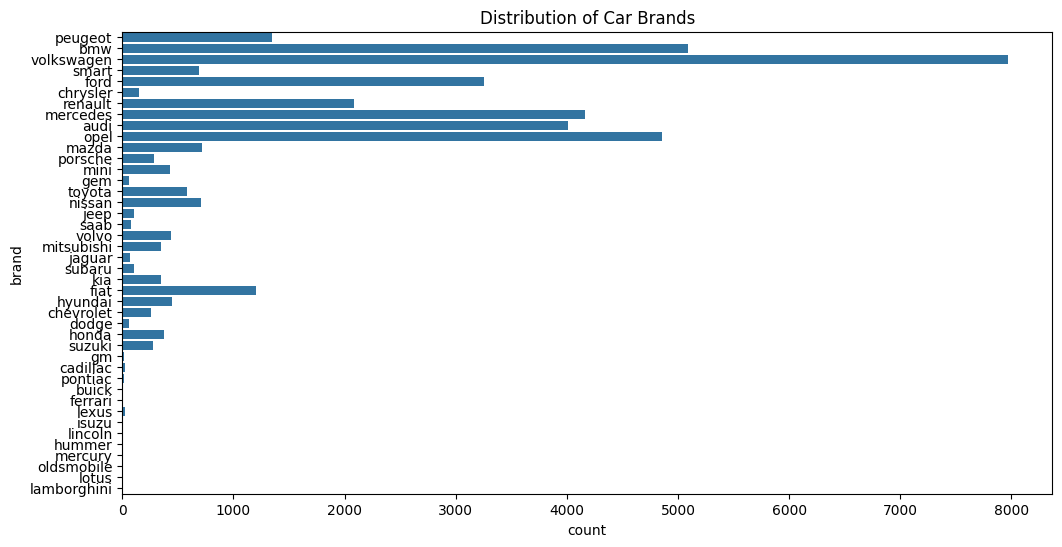

In [150]:
# Let's visualize the distribution of the brand column
plt.figure(figsize=(12,6))
sns.countplot(y=cars['brand'])
plt.title('Distribution of Car Brands')
plt.show()

In [151]:
# What are the top 10 car brands in the dataset?
top_10_brands = cars['brand'].value_counts().head(10)
top_10_brands

brand
volkswagen    7969
bmw           5087
opel          4858
mercedes      4166
audi          4007
ford          3251
renault       2084
peugeot       1350
fiat          1207
mazda          716
Name: count, dtype: int64

In [152]:
# Let's convert price to a numeric value and remove the dollar sign and commas 
cars['price'] = cars['price'].str.replace('$','')
cars['price'] = cars['price'].str.replace(',','')
cars['price'] = cars['price'].astype(int)

In [153]:
cars['price'].describe()

count    4.059900e+04
mean     7.249100e+03
std      1.089015e+05
min      0.000000e+00
25%      1.205000e+03
50%      3.200000e+03
75%      7.800000e+03
max      1.234568e+07
Name: price, dtype: float64

In [154]:
# Let's create a new variable, top brands, that is the entire dataset but only contains the top 10 brands
top_brands = cars[cars['brand'].isin(top_10_brands.index)]

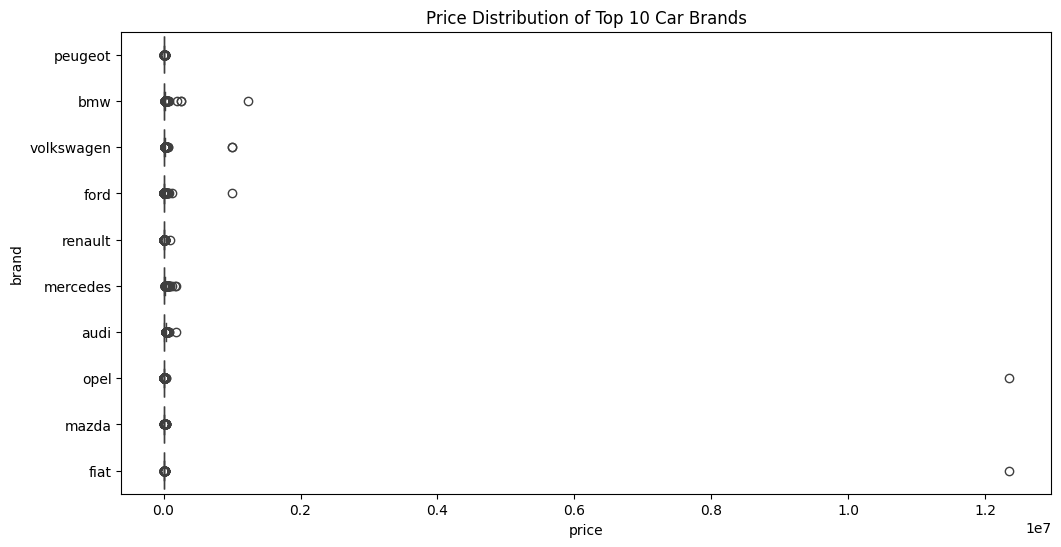

In [155]:
# Let's visualize the distribution of the price column for the top brands
plt.figure(figsize=(12,6))
sns.boxplot(x='price', y='brand', data=top_brands)
plt.title('Price Distribution of Top 10 Car Brands')
plt.show()

In [156]:
# looks like we need to remove outliers. Let's remove any cars that are priced above $500,000
cars = cars[cars['price'] < 500000]

In [157]:
top_brands = cars[cars['brand'].isin(top_10_brands.index)]

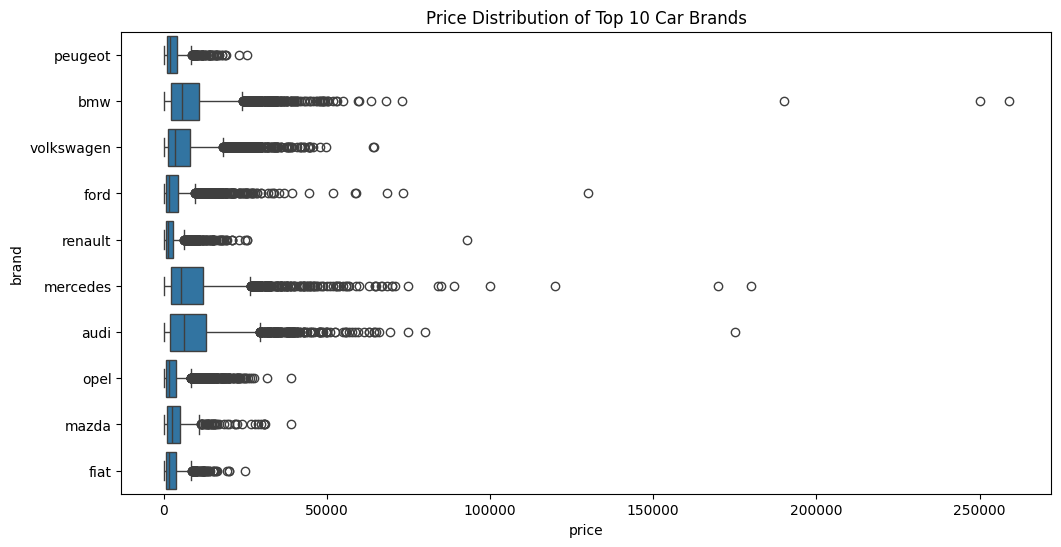

In [158]:
plt.figure(figsize=(12,6))
sns.boxplot(x='price', y='brand', data=top_brands)
plt.title('Price Distribution of Top 10 Car Brands')
plt.show()

In [159]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40590 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          40590 non-null  object
 1   name                 40590 non-null  object
 2   seller               40590 non-null  object
 3   offerType            40590 non-null  object
 4   price                40590 non-null  int64 
 5   abtest               40590 non-null  object
 6   vehicleType          37173 non-null  object
 7   yearOfRegistration   40590 non-null  int64 
 8   gearbox              38968 non-null  object
 9   powerPS              40590 non-null  int64 
 10  model                38849 non-null  object
 11  odometer             40590 non-null  object
 12  monthOfRegistration  40590 non-null  int64 
 13  fuelType             37576 non-null  object
 14  brand                40590 non-null  object
 15  notRepairedDamage    33790 non-null  object
 16  dateCreat

In [160]:
# Let's convert dateCreated and lastSeen to datetime objects
cars['dateCreated'] = pd.to_datetime(cars['dateCreated'])
cars['lastSeen'] = pd.to_datetime(cars['lastSeen'])

In [161]:
# Now let's create a new column called "days_listed" that is the difference between lastSeen and dateCreated
cars['days_listed'] = cars['lastSeen'] - cars['dateCreated']

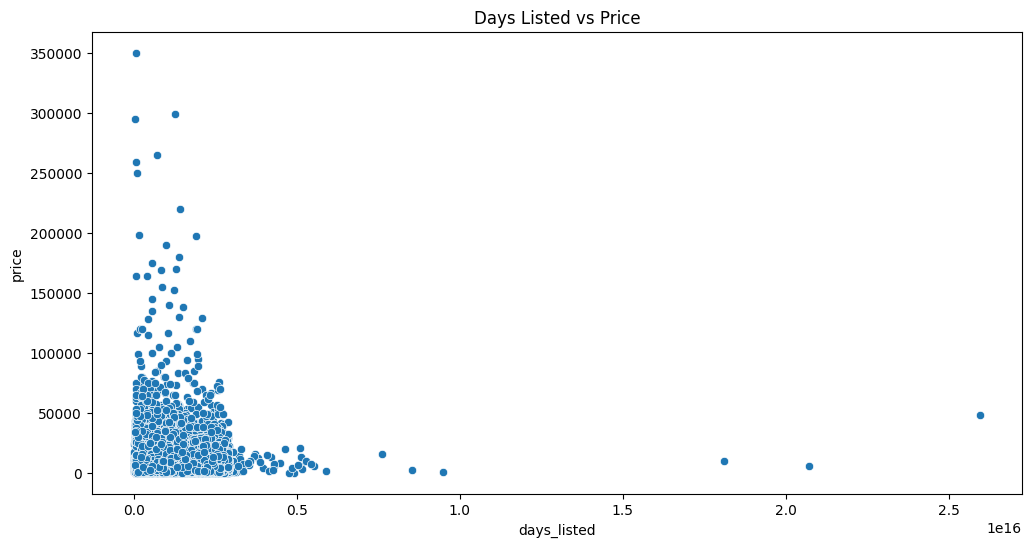

In [162]:
# Let's see if there is a relationship between the days_listed column and the price column
plt.figure(figsize=(12,6))
sns.scatterplot(x='days_listed', y='price', data=cars)
plt.title('Days Listed vs Price')
plt.show()

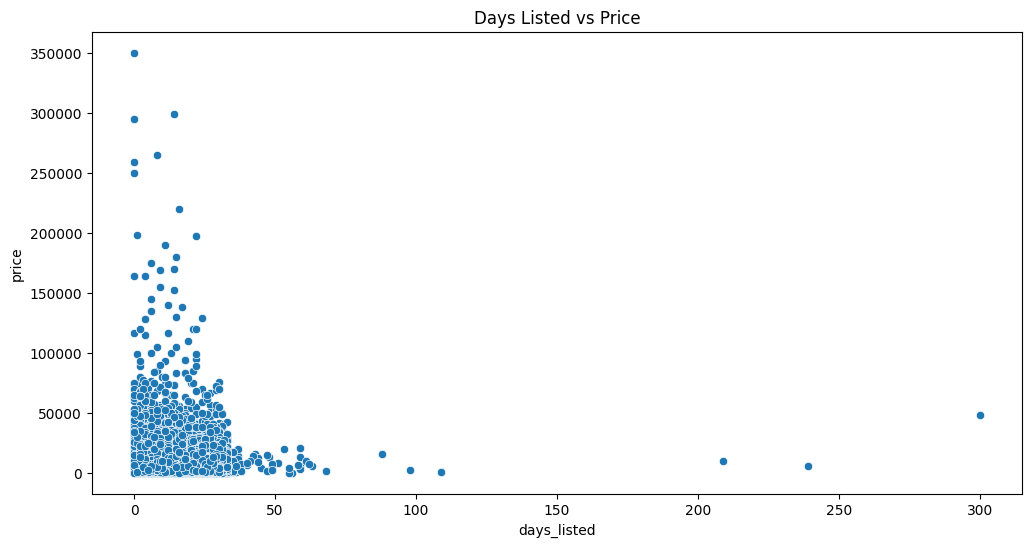

In [163]:
# Let's convert the days_listed column to an integer value just representing the number of days
cars['days_listed'] = cars['days_listed'].dt.days

# Let's see if there is a relationship between the days_listed column and the price column
plt.figure(figsize=(12,6))
sns.scatterplot(x='days_listed', y='price', data=cars)
plt.title('Days Listed vs Price')
plt.show()

In [164]:
# Obiously there are some outliers here. Let's remove any cars that were listed for more than 50 days 
cars = cars[cars['days_listed'] < 50]

In [165]:
cars['days_listed'].describe()

count    40570.000000
mean         8.982425
std          8.435049
min          0.000000
25%          2.000000
50%          6.000000
75%         14.000000
max         49.000000
Name: days_listed, dtype: float64

<Axes: >

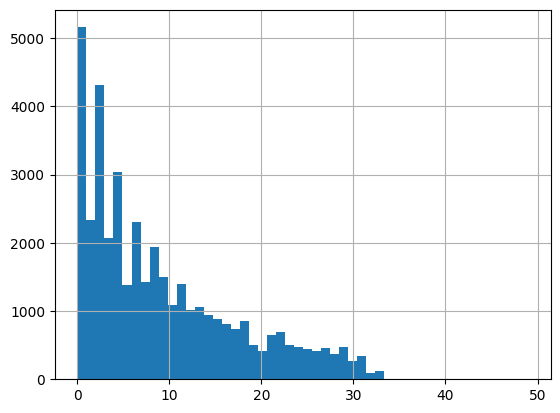

In [166]:
cars['days_listed'].hist(bins=50)

In [167]:
# Let's add a 1 to the days_listed column to avoid any division by zero errors
cars['days_listed'] = cars['days_listed'] + 1

In [168]:
# Clearly the data is right skewed. Let's take the log of the days_listed column to normalize the data
cars['log_days_listed'] = np.log(cars['days_listed'])

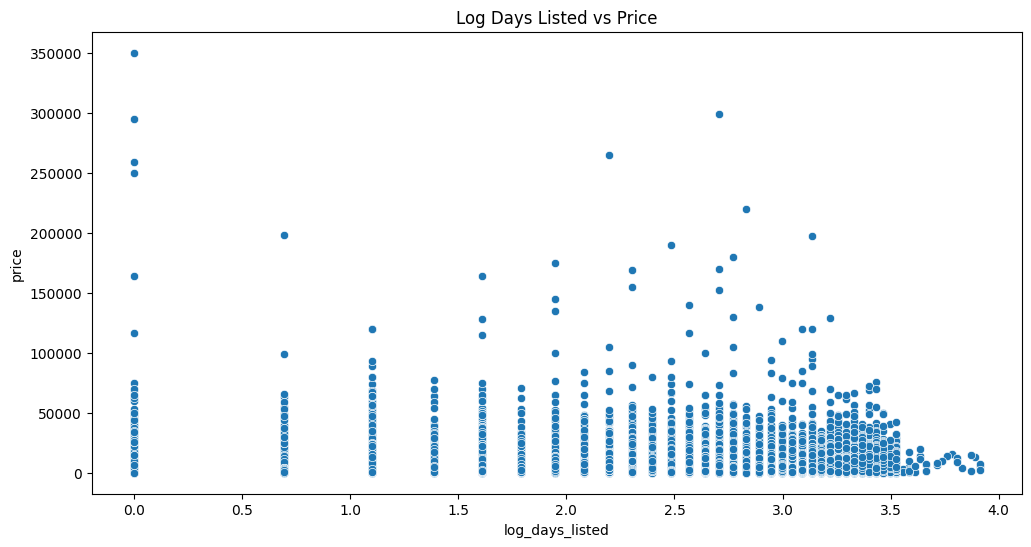

In [169]:
# Now let's see if there is a relationship between the log_days_listed column and the price column
plt.figure(figsize=(12,6))
sns.scatterplot(x='log_days_listed', y='price', data=cars)
plt.title('Log Days Listed vs Price')
plt.show()

In [170]:
# Obviously there is not a great relationship here. Let's just run a correlation matrix to see if there are any relationships between the columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40570 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dateCrawled          40570 non-null  object        
 1   name                 40570 non-null  object        
 2   seller               40570 non-null  object        
 3   offerType            40570 non-null  object        
 4   price                40570 non-null  int64         
 5   abtest               40570 non-null  object        
 6   vehicleType          37156 non-null  object        
 7   yearOfRegistration   40570 non-null  int64         
 8   gearbox              38949 non-null  object        
 9   powerPS              40570 non-null  int64         
 10  model                38830 non-null  object        
 11  odometer             40570 non-null  object        
 12  monthOfRegistration  40570 non-null  int64         
 13  fuelType             37559 non-null 

In [171]:
# Drop the dateCrawled column
cars = cars.drop('dateCrawled', axis=1)

# Let's also drop the name and seller columns as well as the offertype and abtest columns. 
cars = cars.drop(['name','seller','offerType','abtest'], axis=1)

In [172]:
# Let's convert postal code to a string 
cars['postalCode'] = cars['postalCode'].astype(str)

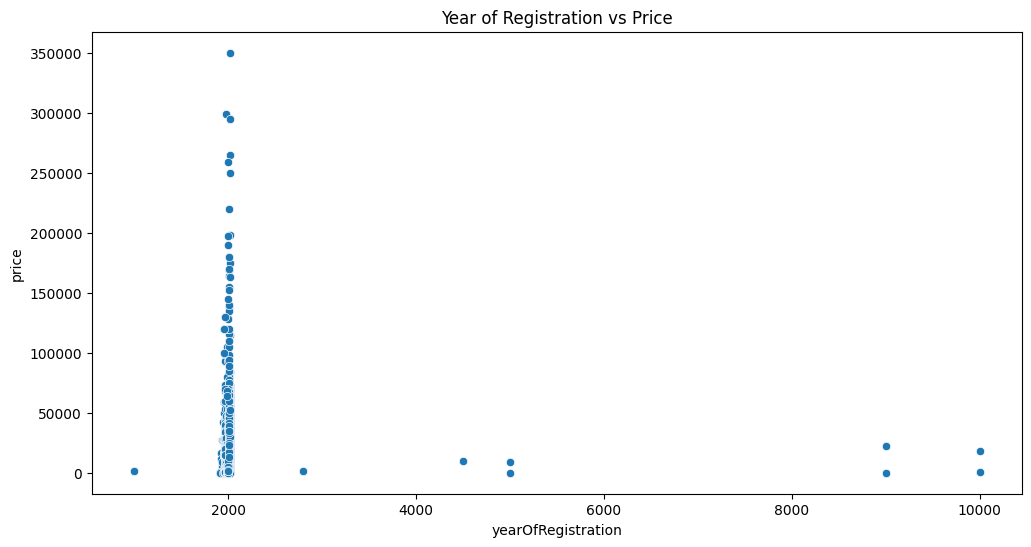

In [173]:
# let's see if there is a relastionship between year of registration and price
plt.figure(figsize=(12,6))
sns.scatterplot(x='yearOfRegistration', y='price', data=cars)
plt.title('Year of Registration vs Price')
plt.show()

In [174]:
# Let's remove any cars that were registered before 1980 and after 2024
cars = cars[(cars['yearOfRegistration'] > 1980) & (cars['yearOfRegistration'] < 2024)]

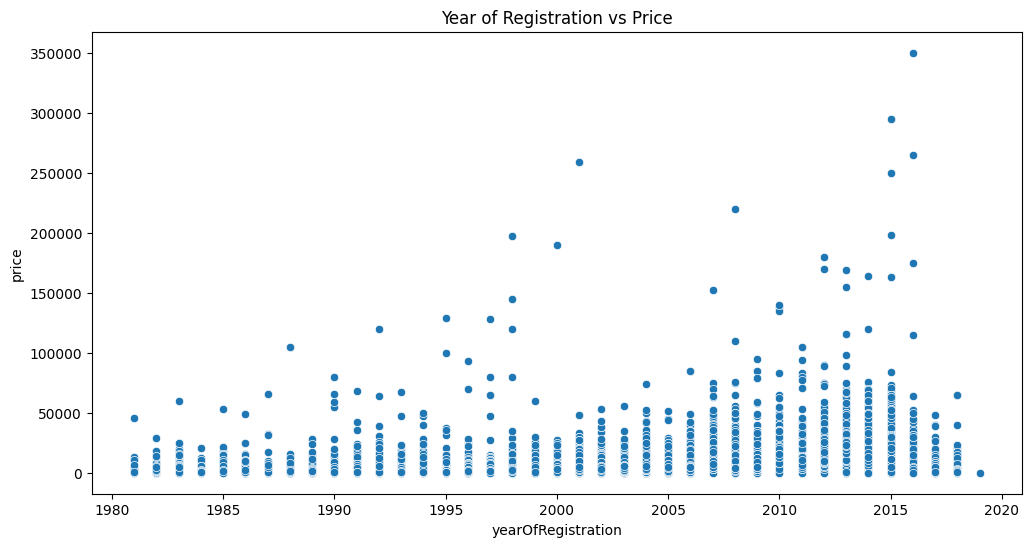

In [175]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='yearOfRegistration', y='price', data=cars)
plt.title('Year of Registration vs Price')
plt.show()

In [176]:
cars.head(20)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,model_name,days_listed,log_days_listed
0,5000,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26,0,79588,2016-04-06 06:45:54,807,12,2.484907
1,8500,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04,0,71034,2016-04-06 14:45:08,740i,3,1.098612
2,8990,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26,0,35394,2016-04-06 20:15:37,Golf,12,2.484907
3,4350,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12,0,33729,2016-03-15 03:16:28,smart,4,1.386294
4,1350,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01,0,39218,2016-04-01 14:38:50,Focus,1,0.000000
5,7900,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21,0,22962,2016-04-06 09:45:21,Grand,17,2.833213
6,300,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20,0,31535,2016-03-23 02:48:59,Golf,4,1.386294
9,590,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16,0,15749,2016-04-06 10:46:35,Megane,22,3.091042
10,999,NaN,2017,manuell,90,NaN,"150,000km",4,benzin,volkswagen,nein,2016-03-14,0,86157,2016-04-07 03:16:21,Golf,25,3.218876
11,350,NaN,2000,NaN,0,NaN,"150,000km",0,benzin,mercedes,NaN,2016-03-16,0,17498,2016-03-16 18:45:34,A140,1,0.000000


In [177]:
# Let's drop the dateCreated and lastSeen columns, as well as the nrOfPictures column
cars = cars.drop(['dateCreated','lastSeen','nrOfPictures'], axis=1)

In [178]:
cars.head(20)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,model_name,days_listed,log_days_listed
0,5000,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,79588,807,12,2.484907
1,8500,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,71034,740i,3,1.098612
2,8990,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,35394,Golf,12,2.484907
3,4350,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,33729,smart,4,1.386294
4,1350,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,39218,Focus,1,0.000000
5,7900,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,22962,Grand,17,2.833213
6,300,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,31535,Golf,4,1.386294
9,590,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,15749,Megane,22,3.091042
10,999,NaN,2017,manuell,90,NaN,"150,000km",4,benzin,volkswagen,nein,86157,Golf,25,3.218876
11,350,NaN,2000,NaN,0,NaN,"150,000km",0,benzin,mercedes,NaN,17498,A140,1,0.000000


In [179]:
# For the gearbox column, let's fill in the missing values with the mode of the column.
cars['gearbox'] = cars['gearbox'].fillna(cars['gearbox'].mode()[0])

# Let's fill in the missing values of the notRepairDamage column with the mode of the column
cars['notRepairedDamage'] = cars['notRepairedDamage'].fillna(cars['notRepairedDamage'].mode()[0])

# For odometer, let's remove the km and convert to an integer
cars['odometer'] = cars['odometer'].str.replace('km','')

In [180]:
# Let's remove the commas and convert to an integer
cars['odometer'] = cars['odometer'].str.replace(',','')
cars['odometer'] = cars['odometer'].astype(int)

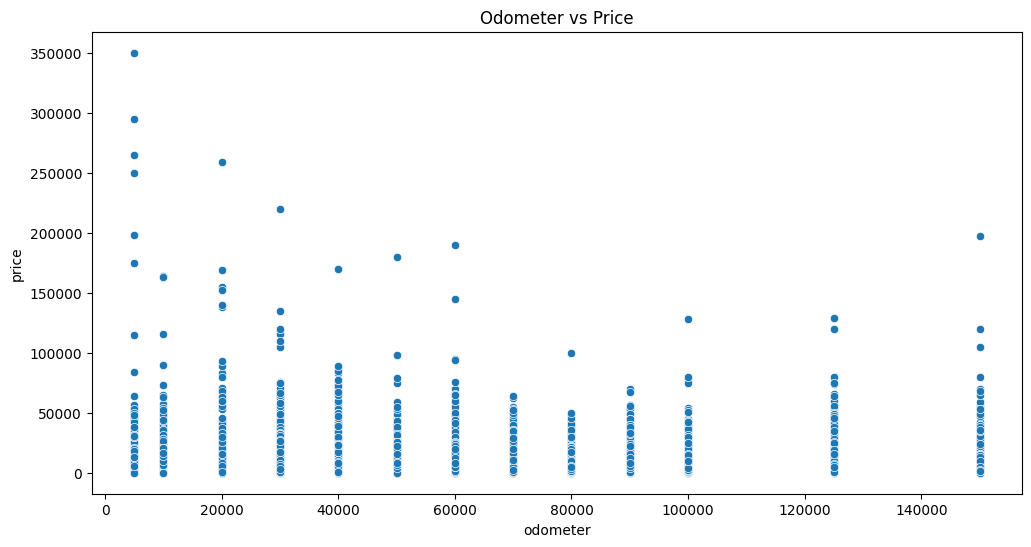

In [181]:
# Let's look at price vs odometer
plt.figure(figsize=(12,6))
sns.scatterplot(x='odometer', y='price', data=cars)
plt.title('Odometer vs Price')
plt.show()

In [182]:
cars['vehicleType'].value_counts()

vehicleType
limousine     10648
kleinwagen     8450
kombi          7604
bus            3447
cabrio         2585
coupe          2129
suv            1631
andere          274
Name: count, dtype: int64

In [183]:
# Convert the word limousine to sedan in vehicle type 
cars['vehicleType'] = cars['vehicleType'].replace('limousine','sedan')

# Convert the word kleinwagen to compact in vehicle type
cars['vehicleType'] = cars['vehicleType'].replace('kleinwagen','compact')

# Convert the word kombi to wagon in vehicle type
cars['vehicleType'] = cars['vehicleType'].replace('kombi','wagon')

# Convert the word cabrio to convertible in vehicle type
cars['vehicleType'] = cars['vehicleType'].replace('cabrio','convertible')

# Convert the workd andere to other in vehicle type
cars['vehicleType'] = cars['vehicleType'].replace('andere','other')

# Convert the word bus to van in vehicle type
cars['vehicleType'] = cars['vehicleType'].replace('bus','van')

# Drop the rows with missing values in the vehicleType column
cars = cars.dropna(subset=['vehicleType'])

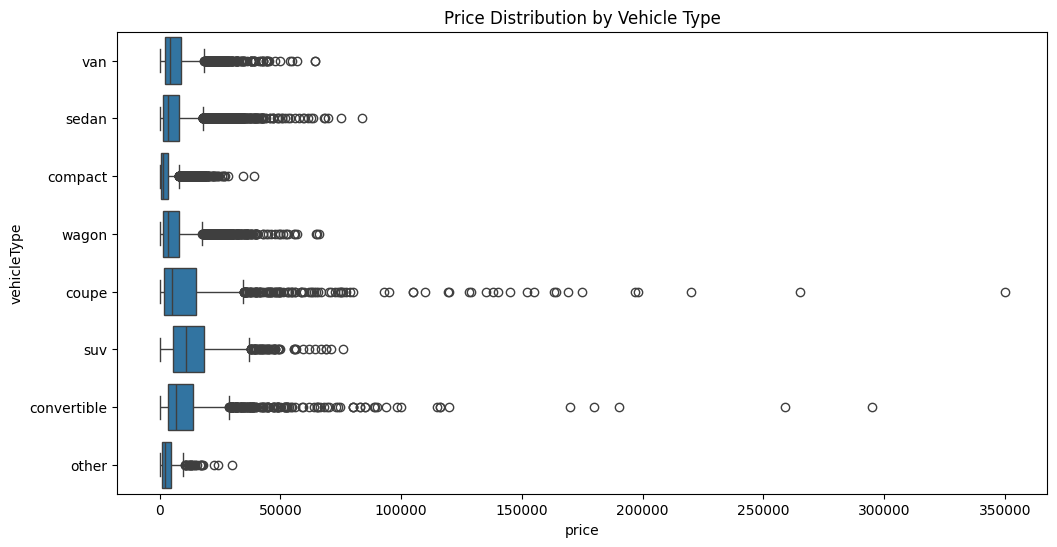

In [184]:
# Let's look at distribution of price for each vehicle type
plt.figure(figsize=(12,6))
sns.boxplot(x='price', y='vehicleType', data=cars)
plt.title('Price Distribution by Vehicle Type')
plt.show()

In [185]:
# Let's do an ANOVA test to see if there is a significant difference in price between the different vehicle types
import scipy.stats as stats

compact = cars[cars['vehicleType'] == 'compact']['price']
convertible = cars[cars['vehicleType'] == 'convertible']['price']
coupe = cars[cars['vehicleType'] == 'coupe']['price']
other = cars[cars['vehicleType'] == 'other']['price']
sedan = cars[cars['vehicleType'] == 'sedan']['price']
suv = cars[cars['vehicleType'] == 'suv']['price']
wagon = cars[cars['vehicleType'] == 'wagon']['price']
van = cars[cars['vehicleType'] == 'van']['price']

stats.f_oneway(compact,convertible,coupe,other,sedan,suv,wagon,van)

F_onewayResult(statistic=562.8004000683476, pvalue=0.0)

In [186]:
# Where is the most significant difference in price between vehicle types?
from statsmodels.stats.multicomp import pairwise_tukeyhsd

vehicle_types = cars['vehicleType'].unique()
tukey = pairwise_tukeyhsd(endog=cars['price'], groups=cars['vehicleType'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
compact,convertible,8144.0389,0.0,7547.3454,8740.7323,True
compact,coupe,8717.0407,0.0,8073.272,9360.8094,True
compact,other,1023.1994,0.5487,-606.389,2652.7878,False
compact,sedan,3287.2919,0.0,2900.5196,3674.0641,True
compact,suv,10542.3291,0.0,9824.3361,11260.3221,True
compact,van,3984.0817,0.0,3447.5524,4520.6111,True
compact,wagon,3109.3119,0.0,2689.6825,3528.9413,True
convertible,coupe,573.0018,0.3304,-203.9613,1349.965,False
convertible,other,-7120.8395,0.0,-8807.4906,-5434.1884,True
convertible,sedan,-4856.747,0.0,-5438.8349,-4274.659,True


In [187]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36768 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                36768 non-null  int64  
 1   vehicleType          36768 non-null  object 
 2   yearOfRegistration   36768 non-null  int64  
 3   gearbox              36768 non-null  object 
 4   powerPS              36768 non-null  int64  
 5   model                35590 non-null  object 
 6   odometer             36768 non-null  int64  
 7   monthOfRegistration  36768 non-null  int64  
 8   fuelType             35271 non-null  object 
 9   brand                36768 non-null  object 
 10  notRepairedDamage    36768 non-null  object 
 11  postalCode           36768 non-null  object 
 12  model_name           36756 non-null  object 
 13  days_listed          36768 non-null  int64  
 14  log_days_listed      36768 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory

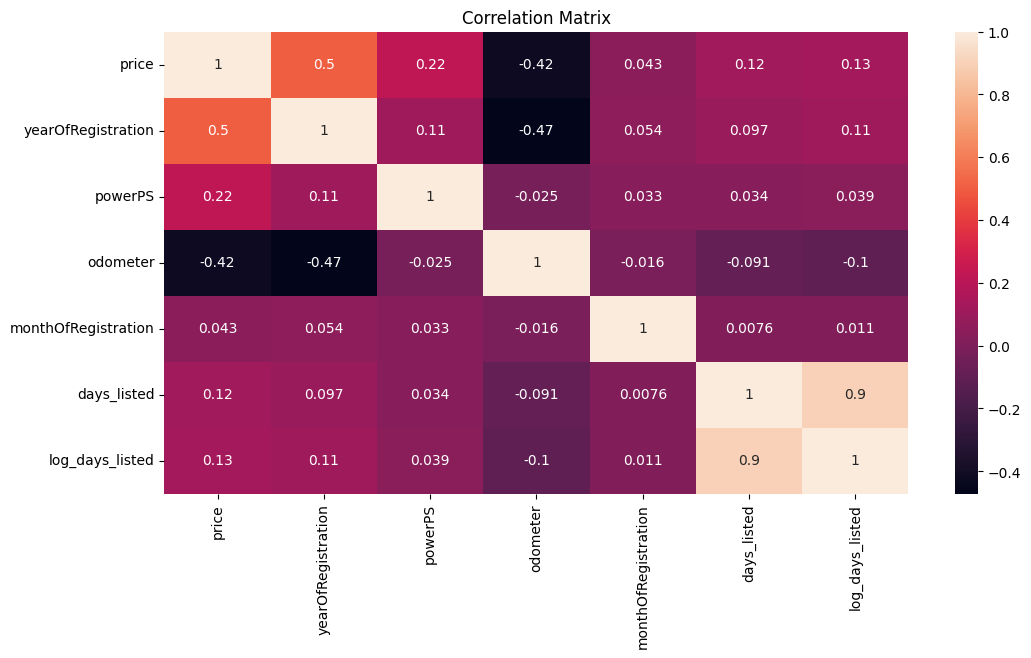

In [188]:
# Select only numeric columns
numeric_cols = cars.select_dtypes(include=[np.number])

# Calculate correlation
correlation = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [189]:
# Let's drop model and model_name columns
cars = cars.drop(['model','model_name'], axis=1)

In [190]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36768 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                36768 non-null  int64  
 1   vehicleType          36768 non-null  object 
 2   yearOfRegistration   36768 non-null  int64  
 3   gearbox              36768 non-null  object 
 4   powerPS              36768 non-null  int64  
 5   odometer             36768 non-null  int64  
 6   monthOfRegistration  36768 non-null  int64  
 7   fuelType             35271 non-null  object 
 8   brand                36768 non-null  object 
 9   notRepairedDamage    36768 non-null  object 
 10  postalCode           36768 non-null  object 
 11  days_listed          36768 non-null  int64  
 12  log_days_listed      36768 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 3.9+ MB


In [191]:
# Drop postal code, month of registration, and powerPS columns
cars = cars.drop(['postalCode','monthOfRegistration','powerPS'], axis=1)

In [192]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36768 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               36768 non-null  int64  
 1   vehicleType         36768 non-null  object 
 2   yearOfRegistration  36768 non-null  int64  
 3   gearbox             36768 non-null  object 
 4   odometer            36768 non-null  int64  
 5   fuelType            35271 non-null  object 
 6   brand               36768 non-null  object 
 7   notRepairedDamage   36768 non-null  object 
 8   days_listed         36768 non-null  int64  
 9   log_days_listed     36768 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 3.1+ MB


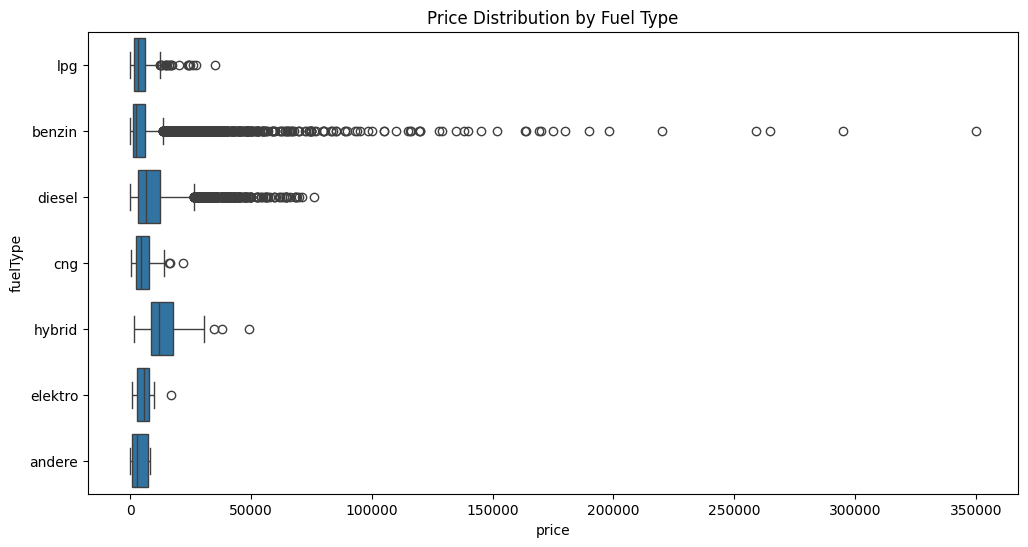

In [193]:
# Boxplot of price vs fuelType
plt.figure(figsize=(12,6))
sns.boxplot(x='price', y='fuelType', data=cars)
plt.title('Price Distribution by Fuel Type')
plt.show()

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_24054/2984376952.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


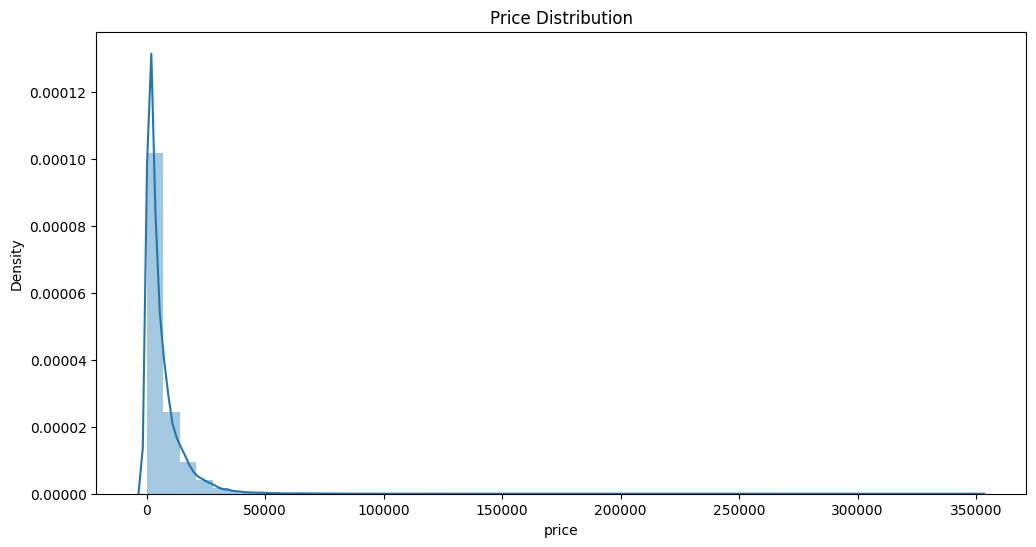

In [194]:
# Look at the distribution of the price column
plt.figure(figsize=(12,6))
sns.distplot(cars['price'])
plt.title('Price Distribution')
plt.show()

In [195]:
# Clearly the data is right skewed. Let's take the log of the price column to normalize the data
cars['log_price'] = np.log(cars['price'])

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [196]:
# Let's remove outliers from the price column
cars = cars[cars['price'] < 100000]

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_24054/1809990117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


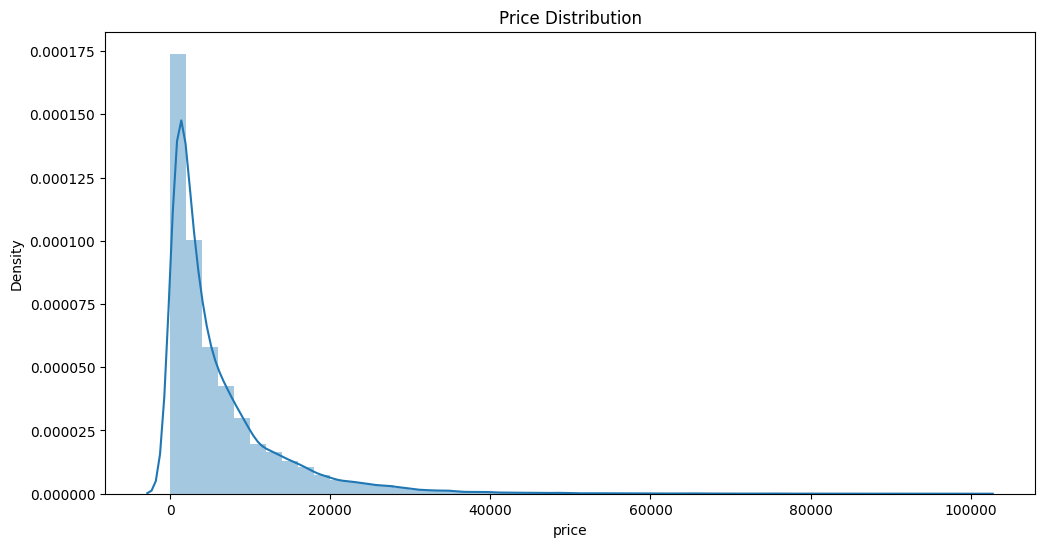

In [197]:
# Now let's look at the distribution of the price column
plt.figure(figsize=(12,6))
sns.distplot(cars['price'])
plt.title('Price Distribution')
plt.show()

In [198]:
# Let's take the log of the price column
cars['log_price'] = np.log(cars['price'])

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [199]:
cars['log_price'].describe()

/Users/tonymoceri/anaconda3/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    3.673700e+04
mean             -inf
std               NaN
min              -inf
25%      7.207860e+00
50%      8.146130e+00
75%      8.987072e+00
max      1.151192e+01
Name: log_price, dtype: float64

In [200]:
# how many cars are priced at $0?
zero_price = cars[cars['price'] == 0]
zero_price_percentage = (len(zero_price)/len(cars))*100
zero_price_percentage

1.6604513161118217

In [201]:
# Let's just drop the rows with a price of $0
cars = cars[cars['price'] != 0]

In [202]:
# Now let's log transform the price column
cars['log_price'] = np.log(cars['price'])

In [203]:
cars['log_price'].describe()  

count    36127.000000
mean         8.103447
std          1.234158
min          0.000000
25%          7.278629
50%          8.160518
75%          8.987197
max         11.511925
Name: log_price, dtype: float64

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_24054/3699494923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['log_price'])


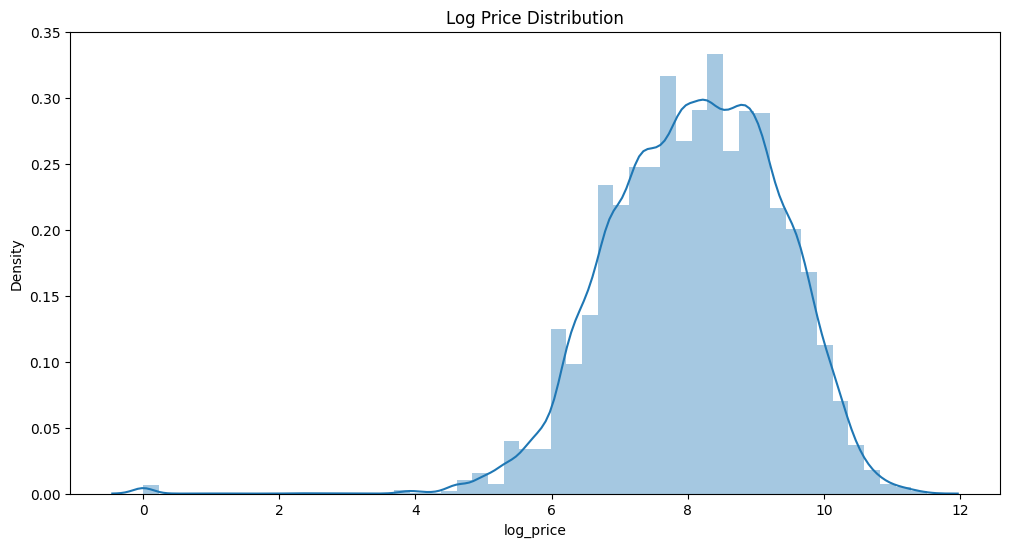

In [204]:
# Let's look at the distribution of the log_price column
plt.figure(figsize=(12,6))
sns.distplot(cars['log_price'])
plt.title('Log Price Distribution')
plt.show()

In [205]:
# Let's drop the price column
cars = cars.drop('price', axis=1)

In [206]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36127 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vehicleType         36127 non-null  object 
 1   yearOfRegistration  36127 non-null  int64  
 2   gearbox             36127 non-null  object 
 3   odometer            36127 non-null  int64  
 4   fuelType            34718 non-null  object 
 5   brand               36127 non-null  object 
 6   notRepairedDamage   36127 non-null  object 
 7   days_listed         36127 non-null  int64  
 8   log_days_listed     36127 non-null  float64
 9   log_price           36127 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.0+ MB


In [207]:
# Let's drop all rows that have a missing value
cars = cars.dropna()

In [208]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34718 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vehicleType         34718 non-null  object 
 1   yearOfRegistration  34718 non-null  int64  
 2   gearbox             34718 non-null  object 
 3   odometer            34718 non-null  int64  
 4   fuelType            34718 non-null  object 
 5   brand               34718 non-null  object 
 6   notRepairedDamage   34718 non-null  object 
 7   days_listed         34718 non-null  int64  
 8   log_days_listed     34718 non-null  float64
 9   log_price           34718 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.9+ MB


In [209]:
# Let's remove days_listed column
cars = cars.drop('days_listed', axis=1)

In [210]:
# let's separate the numerical and categorical columns
numerical_cols = cars.select_dtypes(include=[np.number])
categorical_cols = cars.select_dtypes(include=[object])

# now let's one hot encode the categorical columns
categorical_cols = pd.get_dummies(categorical_cols)

# Let's scale the numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols_scaled = scaler.fit_transform(numerical_cols)

numerical_cols_scaled = pd.DataFrame(numerical_cols_scaled, columns=numerical_cols.columns)

# Let's combine the numerical and categorical columns
cars = pd.concat([numerical_cols_scaled, categorical_cols], axis=1)

In [212]:
# Let's split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = cars.drop('log_price', axis=1)
y = cars['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's build a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Let's see how the model performs on the training set
train_score = model.score(X_train, y_train)
train_score

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values